logistic classification for beans based on data gathered from high-def camera

# Project Steps
1.  ingest data
2.  EDA
3.  Preprocessing data/cleaning
4.  split data
5.  Feature selection/PCA
6.  train model(s)
7.  Evaluate model(s)
8.  Cunclude the best suited model

   


# 1. Ingest Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# read csv data

df = pd.read_excel('data/DryBeanDataset/Dry_Bean_Dataset.xlsx')


In [5]:
#verify data imported
df.shape

(13611, 17)

# 2. EDA

In [7]:
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [8]:
#find any columns with null values

null_cols = df.isnull().any()

print(null_cols)



Area               False
Perimeter          False
MajorAxisLength    False
MinorAxisLength    False
AspectRation       False
Eccentricity       False
ConvexArea         False
EquivDiameter      False
Extent             False
Solidity           False
roundness          False
Compactness        False
ShapeFactor1       False
ShapeFactor2       False
ShapeFactor3       False
ShapeFactor4       False
Class              False
dtype: bool


looks like ther are no null values we will procede to vizualize the data to get an idea of what our data 

todo:   1. add chart tiles
        2. Make assertation about the chart data
        3. Also figure out what each of these paramaters means and define in the comment, this will be helpful for wrigng the papaer.  


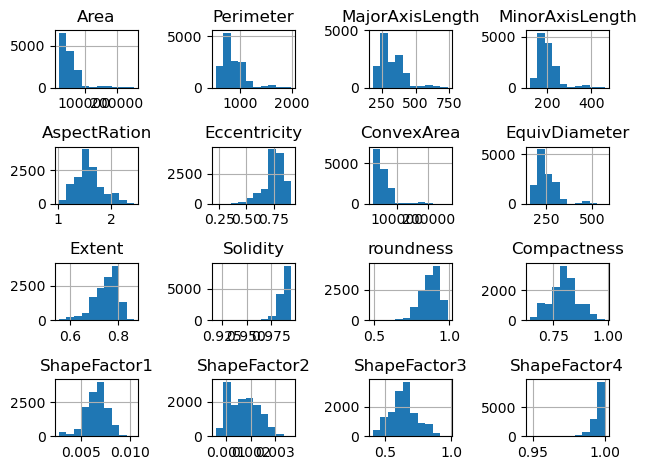

In [10]:
# I just like to see the distribution of data for each of the values
df.hist()
plt.tight_layout()
plt.show()

plot histograms with of values and view them grouped by bean category. I will then make observations of these based on the distributions.  I want this to be a glimps into the dataset and have an idea of how clear cut the differences are that our model is giong to try to assertain


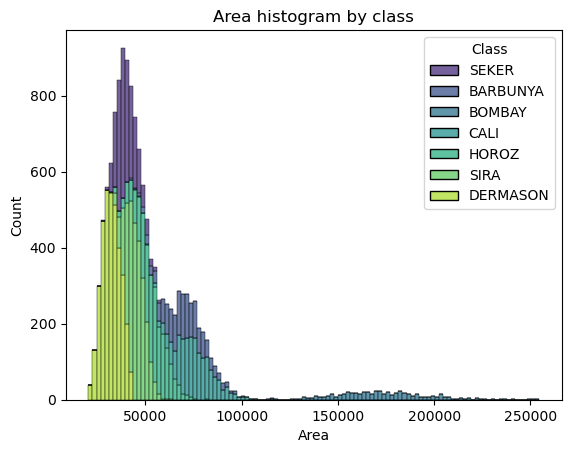

In [251]:
# create a histogram for each of the variables colored by the bean type in order to visualize the clustering of data
import seaborn as sns
sns.histplot(data=df, x='Area', hue ='Class', multiple='stack',palette='viridis')
plt.title('Area histogram by class')
plt.show()

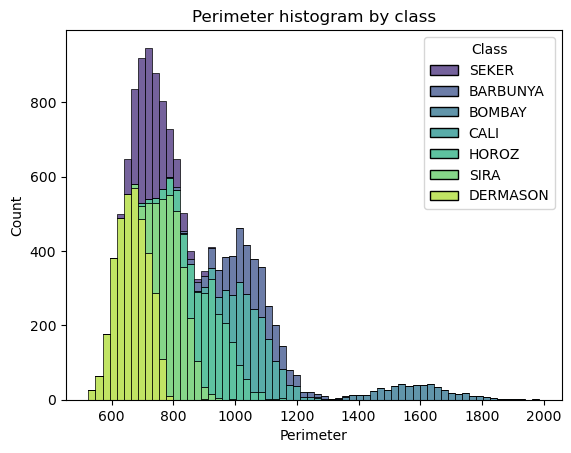

In [225]:
sns.histplot(data=df, x='Perimeter', hue ='Class', multiple='stack',palette='viridis')
plt.title('Perimeter histogram by class')
plt.show()

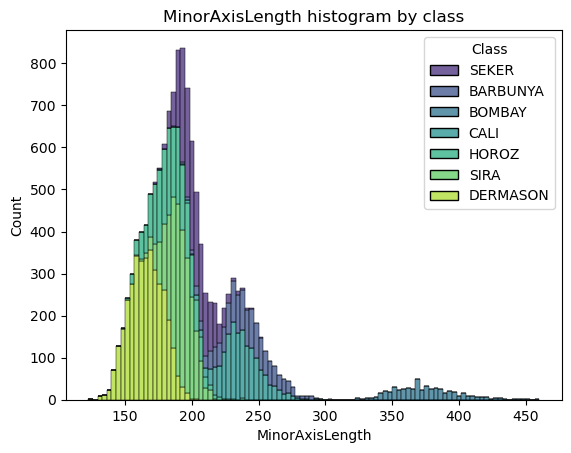

In [227]:
sns.histplot(data=df, x='MinorAxisLength', hue ='Class', multiple='stack',palette='viridis')
plt.title('MinorAxisLength histogram by class')
plt.show()

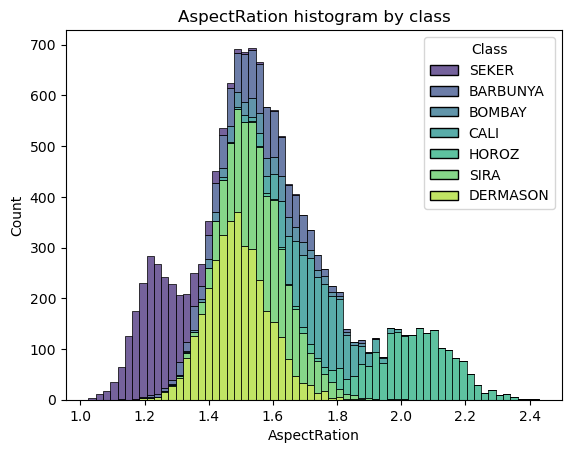

In [229]:
sns.histplot(data=df, x='AspectRation', hue ='Class', multiple='stack',palette='viridis')
plt.title('AspectRation histogram by class')
plt.show()

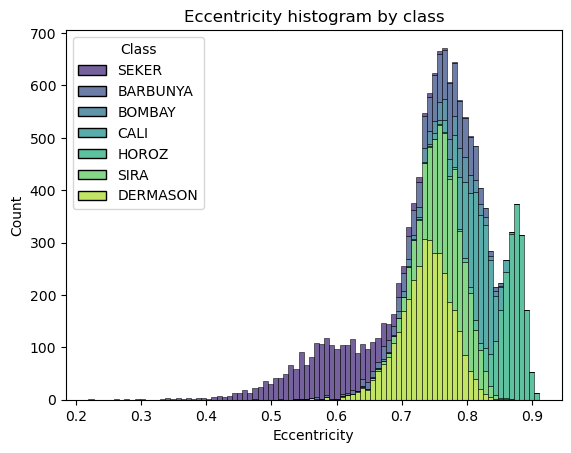

In [231]:
sns.histplot(data=df, x='Eccentricity', hue ='Class', multiple='stack',palette='viridis')
plt.title('Eccentricity histogram by class')
plt.show()

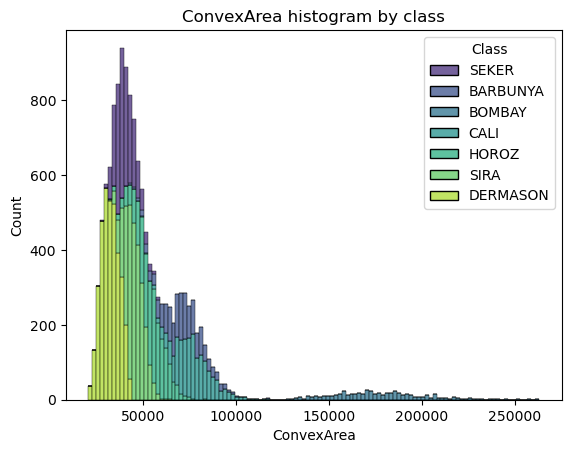

In [233]:
sns.histplot(data=df, x='ConvexArea', hue ='Class', multiple='stack',palette='viridis')
plt.title('ConvexArea histogram by class')
plt.show()

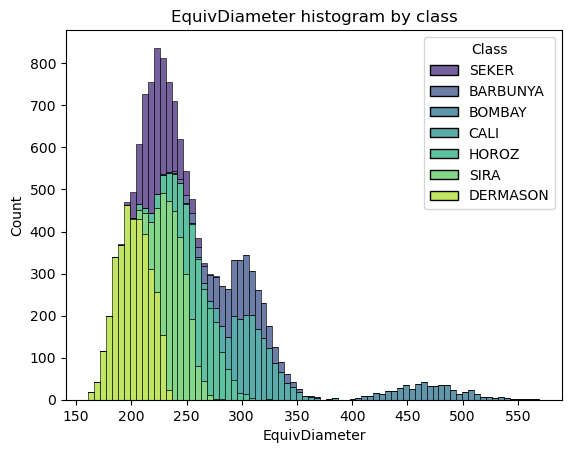

In [235]:
sns.histplot(data=df, x='EquivDiameter', hue ='Class', multiple='stack',palette='viridis')
plt.title('EquivDiameter histogram by class')
plt.show()

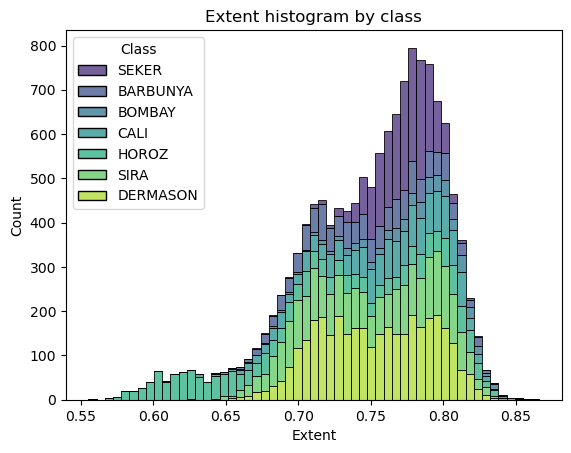

In [237]:
sns.histplot(data=df, x='Extent', hue ='Class', multiple='stack',palette='viridis')
plt.title('Extent histogram by class')
plt.show()

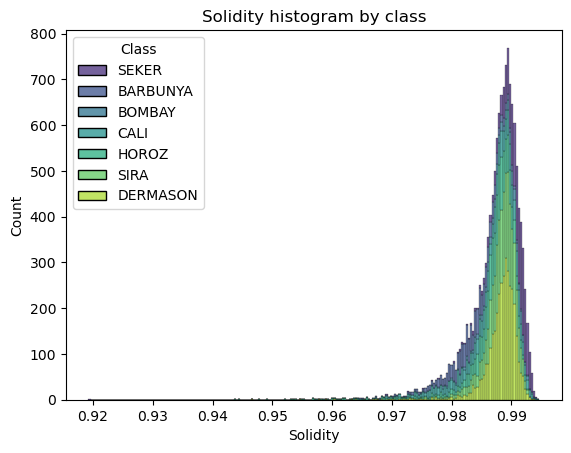

In [239]:
sns.histplot(data=df, x='Solidity', hue ='Class', multiple='stack',palette='viridis')
plt.title('Solidity histogram by class')
plt.show()

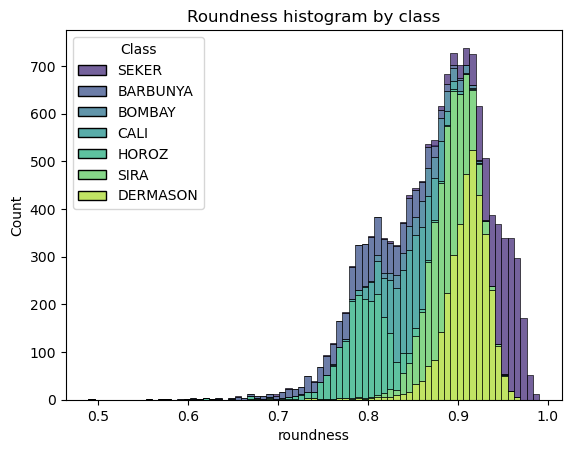

In [241]:
sns.histplot(data=df, x='roundness', hue ='Class', multiple='stack',palette='viridis')
plt.title('Roundness histogram by class')
plt.show()

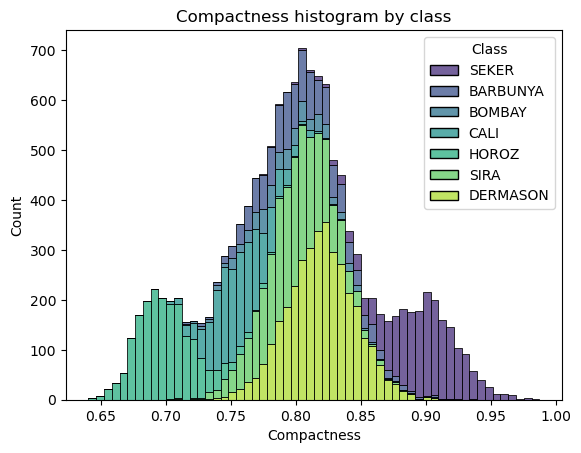

In [243]:
sns.histplot(data=df, x='Compactness', hue ='Class', multiple='stack',palette='viridis')
plt.title('Compactness histogram by class')
plt.show()

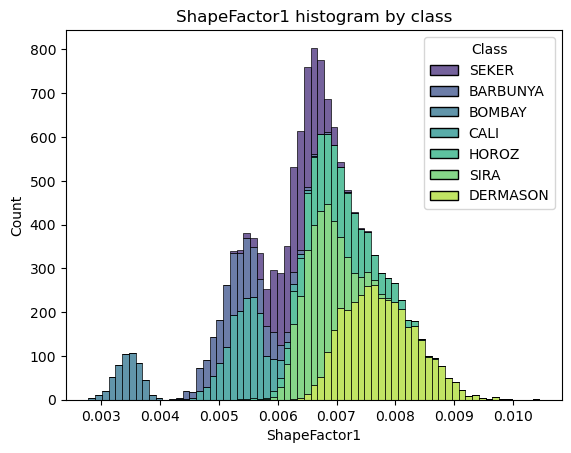

In [245]:
sns.histplot(data=df, x='ShapeFactor1', hue ='Class', multiple='stack',palette='viridis')
plt.title('ShapeFactor1 histogram by class')
plt.show()

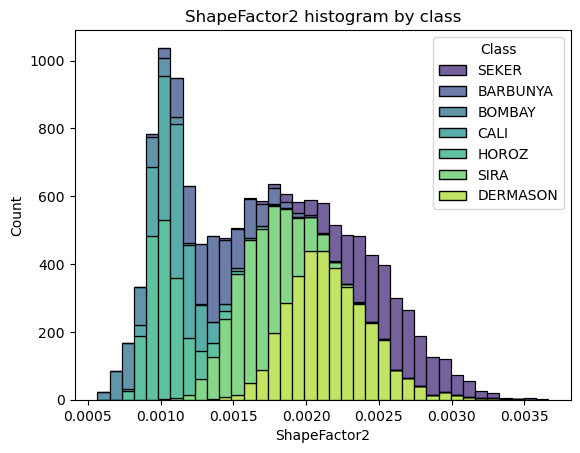

In [247]:
sns.histplot(data=df, x='ShapeFactor2', hue ='Class', multiple='stack',palette='viridis')
plt.title('ShapeFactor2 histogram by class')
plt.show()

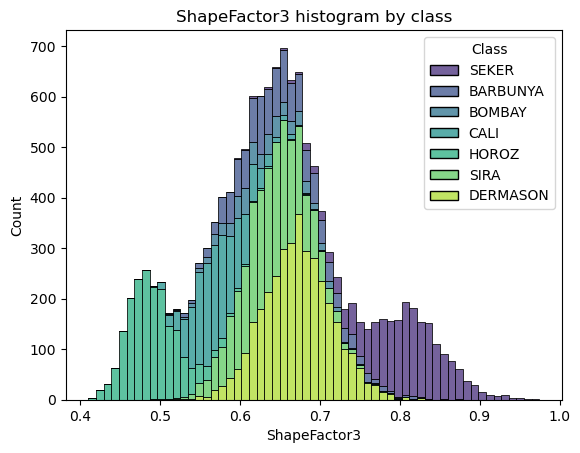

In [249]:
sns.histplot(data=df, x='ShapeFactor3', hue ='Class', multiple='stack',palette='viridis')
plt.title('ShapeFactor3 histogram by class')
plt.show()

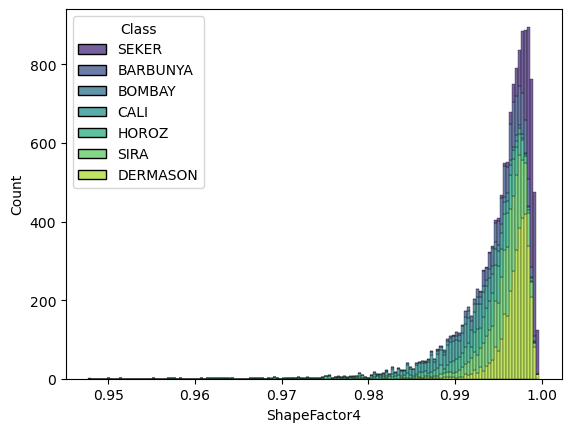

In [26]:
sns.histplot(data=df, x='ShapeFactor4', hue ='Class', multiple='stack',palette='viridis')
plt.title('S histogram by class')
plt.show()

# 3. Preprocessing data/cleaning

In [28]:
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

# 4. split data

In [30]:
# import traintestsplit
from sklearn.model_selection import train_test_split

In [31]:
# isolate y as class and keep the rest of the features as x
y = df['Class']
x = df.drop('Class',axis=1)

In [32]:
#split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [33]:
#verify the shape of the train and test data
print(
x_train.shape,
y_train.shape,
x_test.shape,
y_test.shape
)

(10888, 16) (10888,) (2723, 16) (2723,)


# 5. feature selection

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [36]:
#scale the data 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
#dont fit when applying to test(I forget this occasionally and it causes model integrity program)
x_test_scaled = scaler.transform(x_test)

In [37]:
#veryify the scaling worked and saved to the variable
x_train_scaled.shape

(10888, 16)

In [38]:
# create dummy values of our target so we can create a heatmap of the correlation coefficient

df2 = pd.get_dummies(df, columns=['Class'],prefix='Class')


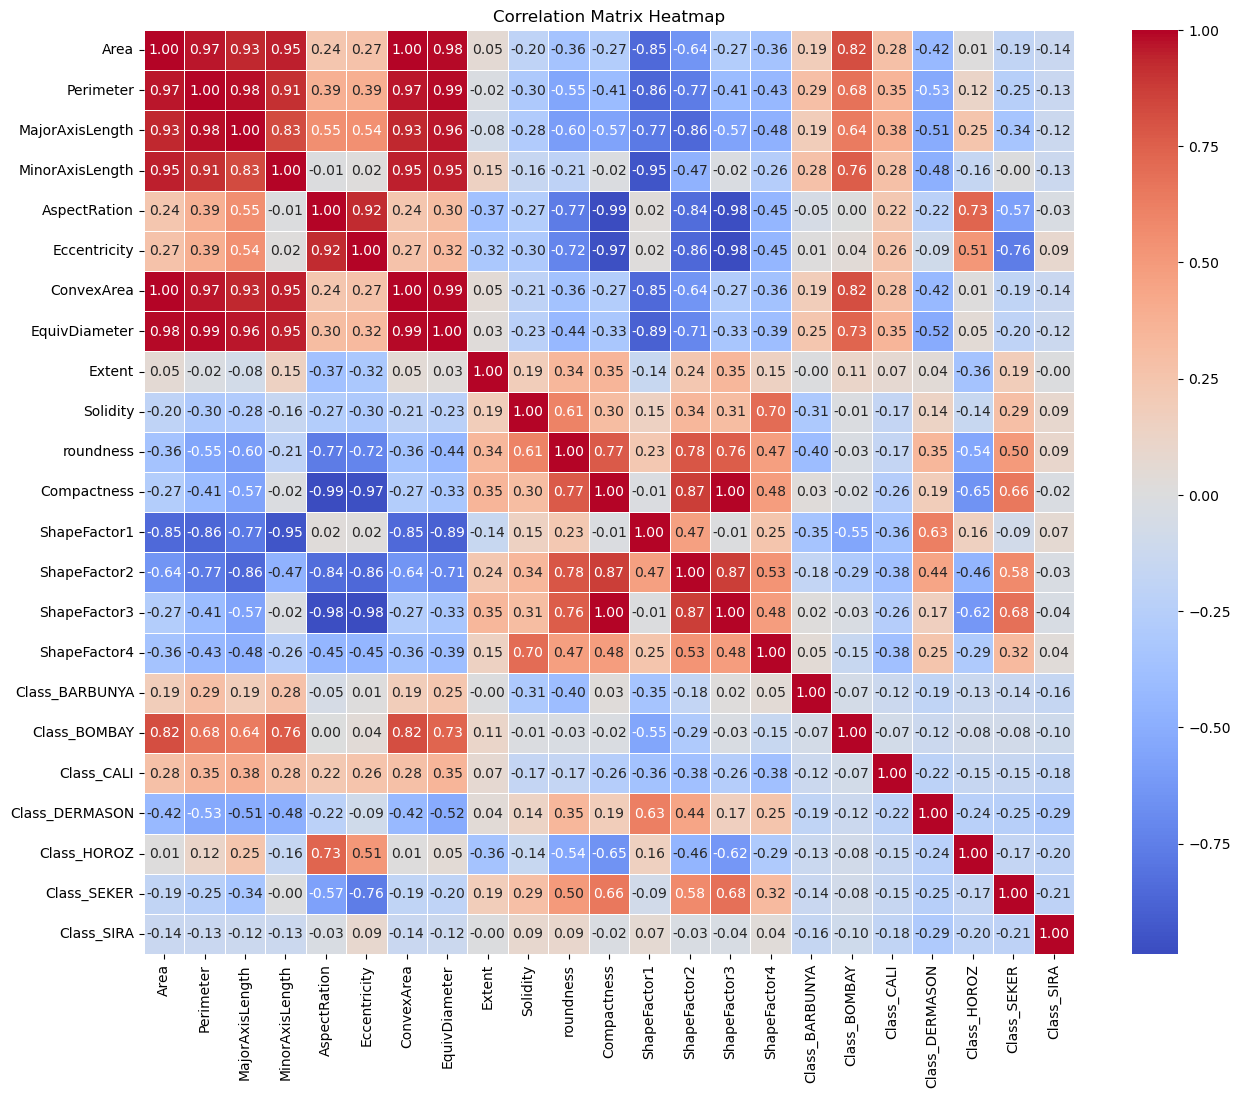

In [258]:
# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Create a heatmap to vizualize corralation between variables
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [40]:
#pca for feature reduction
pca = PCA(n_components=13)





In [41]:
#fit PCA on training data - you have to do this as opposed to fit_transform because the data is already split.  
pca.fit(x_train_scaled)


PCA(n_components=13)

In [42]:
#tranform the data based on the pca for feature reduction
x_train_scaled = pca.transform(x_train_scaled)
x_test_scaled = pca.transform(x_test_scaled)

In [43]:
#verify that the revised data sets have 13 features
print(x_train_scaled.shape)
print(x_test_scaled.shape)

(10888, 13)
(2723, 13)


# 6. train model(s)

In [45]:
#lots of imports for this next section
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy.stats import uniform, loguniform,randint
from sklearn.model_selection import RandomizedSearchCV


### A. logistic regression

In [47]:
#build paramaters for the model
log_params = {
    'C': loguniform(0.001, 100),
    'penalty': ['l1','l2'],
    'solver': ['liblinear','saga']
}

In [48]:
#create the model, I had to expand the max iterations to avoid errors that happened in about 10% of the folds
log_model = LogisticRegression(max_iter=10000)
log_random_search = RandomizedSearchCV(log_model,log_params, n_iter=50,cv=5, scoring='accuracy',verbose=10,random_state=42)

In [49]:
#fit the model (sorry for the extra logs, I like to track the progress)
log_random_search.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5; 1/50] START C=0.0745934328572655, penalty=l1, solver=liblinear.........
[CV 1/5; 1/50] END C=0.0745934328572655, penalty=l1, solver=liblinear;, score=0.910 total time=   0.1s
[CV 2/5; 1/50] START C=0.0745934328572655, penalty=l1, solver=liblinear.........
[CV 2/5; 1/50] END C=0.0745934328572655, penalty=l1, solver=liblinear;, score=0.912 total time=   0.1s
[CV 3/5; 1/50] START C=0.0745934328572655, penalty=l1, solver=liblinear.........
[CV 3/5; 1/50] END C=0.0745934328572655, penalty=l1, solver=liblinear;, score=0.910 total time=   0.2s
[CV 4/5; 1/50] START C=0.0745934328572655, penalty=l1, solver=liblinear.........
[CV 4/5; 1/50] END C=0.0745934328572655, penalty=l1, solver=liblinear;, score=0.911 total time=   0.1s
[CV 5/5; 1/50] START C=0.0745934328572655, penalty=l1, solver=liblinear.........
[CV 5/5; 1/50] END C=0.0745934328572655, penalty=l1, solver=liblinear;, score=0.915 total time=   0.1s
[CV 1/5; 2/50] STA

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
                   n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000021D87B65F50>,
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='accuracy', verbose=10)

In [50]:
#print the best paramaters and the best cv score
print("Best parameters found:", log_random_search.best_params_)
print("Best cross-validation score:", log_random_search.best_score_)

Best parameters found: {'C': 14.528246637516036, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation score: 0.9246878523405855


In [51]:
#save the paramaters and create the model 
best_log_params = log_random_search.best_params_
best_log_model = LogisticRegression(**best_log_params,max_iter=10000)

In [52]:
best_log_model.fit(x_train_scaled,y_train)

LogisticRegression(C=14.528246637516036, max_iter=10000, solver='saga')

### B. KNN

In [54]:
# save paramaters for knn model
knn_params={
    'n_neighbors': range(1,21),
    'metric': ['euclidean','manhattan','minkowski']
}

In [55]:

knn_model = KNeighborsClassifier()

In [56]:
#create grid search witht he paraters saved in the previous step
knn_grid_search = GridSearchCV(knn_model,knn_params,cv=5,scoring='accuracy',verbose=10)

In [57]:
#train the model
knn_grid_search.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5; 1/60] START metric=euclidean, n_neighbors=1............................
[CV 1/5; 1/60] END metric=euclidean, n_neighbors=1;, score=0.907 total time=   0.0s
[CV 2/5; 1/60] START metric=euclidean, n_neighbors=1............................
[CV 2/5; 1/60] END metric=euclidean, n_neighbors=1;, score=0.904 total time=   0.0s
[CV 3/5; 1/60] START metric=euclidean, n_neighbors=1............................
[CV 3/5; 1/60] END metric=euclidean, n_neighbors=1;, score=0.908 total time=   0.0s
[CV 4/5; 1/60] START metric=euclidean, n_neighbors=1............................
[CV 4/5; 1/60] END metric=euclidean, n_neighbors=1;, score=0.903 total time=   0.0s
[CV 5/5; 1/60] START metric=euclidean, n_neighbors=1............................
[CV 5/5; 1/60] END metric=euclidean, n_neighbors=1;, score=0.908 total time=   0.0s
[CV 1/5; 2/60] START metric=euclidean, n_neighbors=2............................
[CV 1/5; 2/60] END metric=euclid

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21)},
             scoring='accuracy', verbose=10)

In [58]:
print("Best parameters found:", knn_grid_search.best_params_)
print("Best cross-validation score:", knn_grid_search.best_score_)

Best parameters found: {'metric': 'manhattan', 'n_neighbors': 16}
Best cross-validation score: 0.9252391539734421


In [59]:
best_knn_params = knn_grid_search.best_params_
best_knn_model = KNeighborsClassifier(**best_knn_params)

In [60]:
best_knn_model.fit(x_train_scaled,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=16)

### C. Random Forest

In [62]:
rf_params = {
    'n_estimators': randint(50,500),
    'max_features': ['sqrt','log2'],
    'max_depth': randint(2,20),
    'min_samples_split': randint(2,10)
}
    

In [63]:
rf_model = RandomForestClassifier()
rf_random_search = RandomizedSearchCV(estimator=rf_model,param_distributions=rf_params,n_iter=50, cv=5, scoring='accuracy',random_state=42,verbose=10)

In [64]:
rf_random_search.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5; 1/50] START max_depth=8, max_features=log2, min_samples_split=6, n_estimators=320
[CV 1/5; 1/50] END max_depth=8, max_features=log2, min_samples_split=6, n_estimators=320;, score=0.922 total time=   5.5s
[CV 2/5; 1/50] START max_depth=8, max_features=log2, min_samples_split=6, n_estimators=320
[CV 2/5; 1/50] END max_depth=8, max_features=log2, min_samples_split=6, n_estimators=320;, score=0.924 total time=   5.5s
[CV 3/5; 1/50] START max_depth=8, max_features=log2, min_samples_split=6, n_estimators=320
[CV 3/5; 1/50] END max_depth=8, max_features=log2, min_samples_split=6, n_estimators=320;, score=0.920 total time=   5.5s
[CV 4/5; 1/50] START max_depth=8, max_features=log2, min_samples_split=6, n_estimators=320
[CV 4/5; 1/50] END max_depth=8, max_features=log2, min_samples_split=6, n_estimators=320;, score=0.921 total time=   5.4s
[CV 5/5; 1/50] START max_depth=8, max_features=log2, min_samples_split=6, n_estimators

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021D87712810>,
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021D87711B10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021D8C41AC50>},
                   random_state=42, scoring='accuracy', verbose=10)

In [65]:
print("Best parameters found:", rf_random_search.best_params_)
print("Best cross-validation score:", rf_random_search.best_score_)

Best parameters found: {'max_depth': 15, 'max_features': 'log2', 'min_samples_split': 3, 'n_estimators': 314}
Best cross-validation score: 0.9278105310844277


In [66]:
best_rf_params = rf_random_search.best_params_
best_rf_model = RandomForestClassifier(**best_rf_params)

In [67]:
best_rf_model.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=15, max_features='log2', min_samples_split=3,
                       n_estimators=314)

### D. SVM

In [69]:
# with svm there are so many optoin between the c and gamma values I find it best to run agains a range


#create paramaters

svm_params = {'C': loguniform(0.1, 100),
              'gamma': loguniform(0.001,1),
              'kernel': ['rbf'] #may add additional kernals down the road
             }


In [70]:
svm = SVC()

In [71]:
svm_random_search = RandomizedSearchCV(svm, svm_params, n_iter=50, cv=5,verbose=10, random_state=42)
svm_random_search.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5; 1/50] START C=1.3292918943162166, gamma=0.711447600934342, kernel=rbf..
[CV 1/5; 1/50] END C=1.3292918943162166, gamma=0.711447600934342, kernel=rbf;, score=0.921 total time=   1.5s
[CV 2/5; 1/50] START C=1.3292918943162166, gamma=0.711447600934342, kernel=rbf..
[CV 2/5; 1/50] END C=1.3292918943162166, gamma=0.711447600934342, kernel=rbf;, score=0.924 total time=   1.5s
[CV 3/5; 1/50] START C=1.3292918943162166, gamma=0.711447600934342, kernel=rbf..
[CV 3/5; 1/50] END C=1.3292918943162166, gamma=0.711447600934342, kernel=rbf;, score=0.927 total time=   1.5s
[CV 4/5; 1/50] START C=1.3292918943162166, gamma=0.711447600934342, kernel=rbf..
[CV 4/5; 1/50] END C=1.3292918943162166, gamma=0.711447600934342, kernel=rbf;, score=0.926 total time=   1.5s
[CV 5/5; 1/50] START C=1.3292918943162166, gamma=0.711447600934342, kernel=rbf..
[CV 5/5; 1/50] END C=1.3292918943162166, gamma=0.711447600934342, kernel=rbf;, score=0.930 to

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000021D8CA71390>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000021D87753310>,
                                        'kernel': ['rbf']},
                   random_state=42, verbose=10)

In [72]:
print("Best parameters found:", svm_random_search.best_params_)
print("Best cross-validation score:", svm_random_search.best_score_)

Best parameters found: {'C': 6.358358856676251, 'gamma': 0.13311216080736885, 'kernel': 'rbf'}
Best cross-validation score: 0.9317599091934081


In [73]:
best_svm_params = svm_random_search.best_params_
best_svm_model = svm = SVC(**best_svm_params)

In [74]:
best_svm_model.fit(x_train_scaled,y_train)

SVC(C=6.358358856676251, gamma=0.13311216080736885)


# 7.  Evaluate model(s)


- Accuracy: The overall proportion of correct predictions. 
- Confusion Matrix: A table that breaks down true positives, false positives, true negatives, and false negatives, offering a detailed view of performance. 
- Precision: Measures how many of the positive predictions were correct, focusing on minimizing false positives. 
- Recall (Sensitivity): Measures the model's ability to identify all actual positive cases, minimizing false negatives. 
- F1-Score: A balanced measure that combines precision and recall, useful when both are important. 

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [78]:
#preditions
log_pred = best_log_model.predict(x_test_scaled)
knn_pred = best_knn_model.predict(x_test_scaled)
rf_pred = best_rf_model.predict(x_test_scaled)
svm_pred = best_svm_model.predict(x_test_scaled)




In [79]:
#accuracy
log_acc = accuracy_score(y_test,log_pred)
knn_acc = accuracy_score(y_test,knn_pred)
rf_acc = accuracy_score(y_test,rf_pred)
svm_acc = accuracy_score(y_test,svm_pred)

In [80]:
print(log_acc,knn_acc,rf_acc,svm_acc)

0.9258171134777818 0.922879177377892 0.9335291957399926 0.9313257436650753


In [81]:
#precision
log_pre = precision_score(y_test,log_pred,average='macro')
knn_pre = precision_score(y_test,knn_pred,average='macro')
rf_pre = precision_score(y_test,rf_pred,average='macro')
svm_pre = precision_score(y_test,svm_pred,average='macro')

In [82]:
print(log_pre,knn_pre,rf_pre,svm_pre)

0.9389485157865192 0.9377147659038673 0.9461340491352174 0.9431399884379452


In [83]:
#recall

log_rec = recall_score(y_test,log_pred,average='macro')
knn_rec = recall_score(y_test,knn_pred,average='macro')
rf_rec = recall_score(y_test,rf_pred,average='macro')
svm_rec = recall_score(y_test,svm_pred,average='macro')



In [84]:
print(log_rec,knn_rec,rf_rec,svm_rec)

0.9367365854343799 0.9332227595254435 0.9431601038558158 0.9405845464731606


In [85]:
#F1-Score

log_f1 = f1_score(y_test,log_pred,average='macro')
knn_f1 = f1_score(y_test,knn_pred,average='macro')
rf_f1 = f1_score(y_test,rf_pred,average='macro')
svm_f1 = f1_score(y_test,svm_pred,average='macro')


<function matplotlib.pyplot.show(close=None, block=None)>

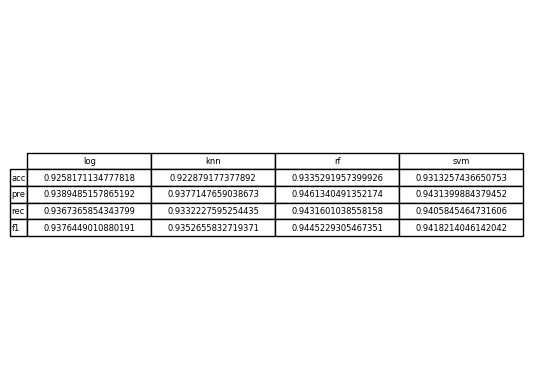

In [86]:
#accuracy comparison chart

data = np.array([
    [log_acc,knn_acc,rf_acc,svm_acc],
    [log_pre,knn_pre,rf_pre,svm_pre],
    [log_rec,knn_rec,rf_rec,svm_rec],
    [log_f1,knn_f1,rf_f1,svm_f1]
           
           ])
col_labels = ['log','knn','rf','svm']
row_labels = ['acc','pre','rec','f1']


fig, ax = plt.subplots()
ax.axis('off')

table = ax.table(
    cellText=data,
    rowLabels = row_labels,
    colLabels=col_labels,
    loc="center",
    cellLoc="center"
)

plt.show





In [87]:
#confusion matrixes

['SEKER' 'BARBUNYA' 'SEKER' ... 'DERMASON' 'CALI' 'SIRA']


In [205]:
from sklearn.metrics import confusion_matrix

labels = sorted(y_test.unique())

# cm = confusion_matrix(y_true, y_pred, labels=['cat', 'dog', 'horse'])

log_cm = confusion_matrix(y_test, log_pred,labels=labels)
knn_cm = confusion_matrix(y_test, knn_pred,labels=labels)
rf_cm = confusion_matrix(y_test, rf_pred,labels=labels)
svm_cm = confusion_matrix(y_test, svm_pred,labels=labels)

Text(0.5, 1.0, 'SVM confusion matrix')

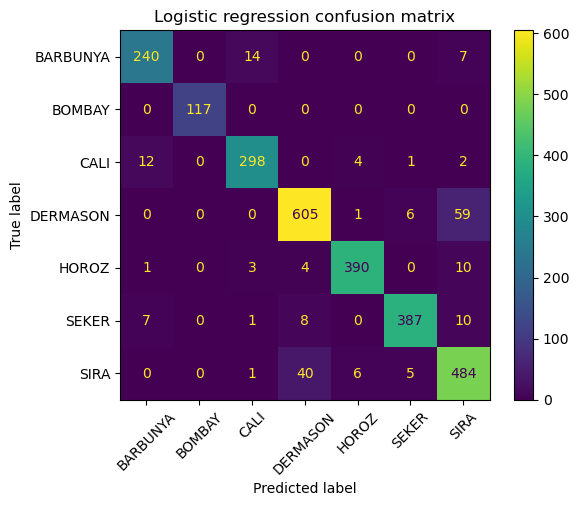

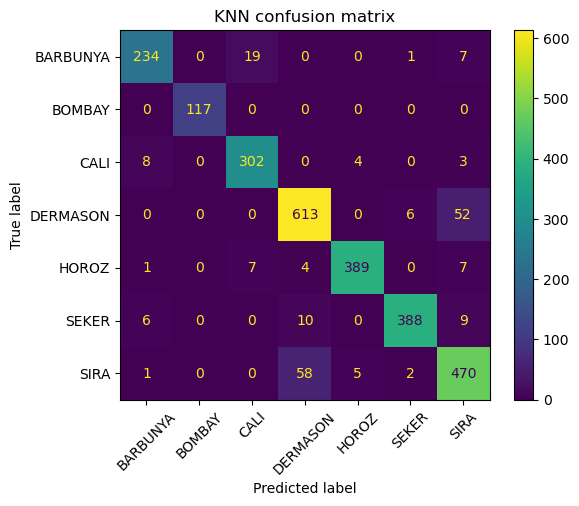

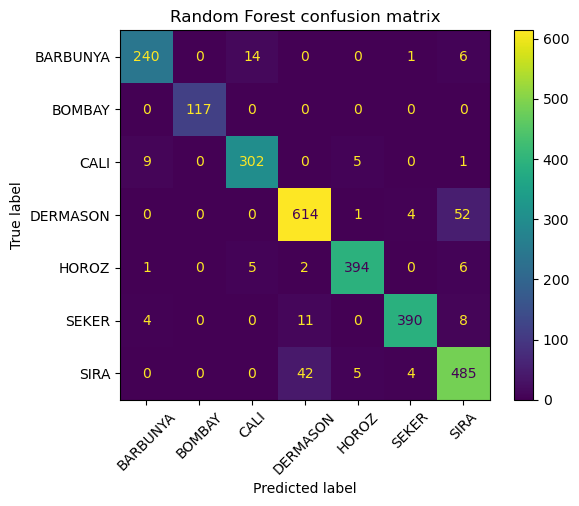

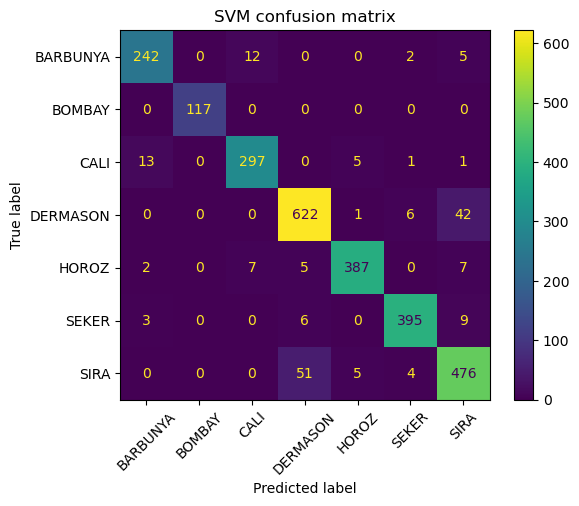

In [219]:
from sklearn.metrics import ConfusionMatrixDisplay

log_cm_display = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=labels)
knn_cm_display = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=labels)
rf_cm_display = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=labels)
svm_cm_display = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=labels)





log_cm_display.plot(xticks_rotation=45)
plt.title('Logistic regression confusion matrix')
knn_cm_display.plot(xticks_rotation=45)
plt.title('KNN confusion matrix')
rf_cm_display.plot(xticks_rotation=45)
plt.title('Random Forest confusion matrix')
svm_cm_display.plot(xticks_rotation=45)
plt.title('SVM confusion matrix')

# 8.  Cunclude the best suited model

it appears based on our analysis metrics the random forest model inched out ahead of the rest.  It had a better preformance in all our evaluatino metric groups by a margin.

# 9. Q&A 